# Step 7: 

Step 7: use all the following techniques to address the outliers and explain/discuss the differences in the outcome of each of the methods
* Quantile-based Flooring and Capping
* Trimming
* Log Transformation

description of the columns

city_name City name
lat Geographical coordinates of the location (latitude)
lon Geographical coordinates of the location (longitude)
main
main.temp Temperature
main.temp_min Minimum temperature at the moment. This is deviation from temperature that is possible for large cities and megalopolises geographically expanded (use these parameter optionally).
main.temp_max Maximum temperature at the moment. This is deviation from temperature that is possible for large cities and megalopolises geographically expanded (use these parameter optionally).
main.feels_like This temperature parameter accounts for the human perception of weather 
main.pressure Atmospheric pressure (on the sea level), hPa
main.humidity Humidity, %
main.dew_point Atmospheric temperature (varying according to pressure and humidity) below which water droplets begin to condense and dew can form. Units – default: kelvin
wind
wind.speed Wind speed. Units – default: meter/sec
wind.deg Wind direction, degrees (meteorological)
wind.gust Wind gust. Units – default: meter/sec
clouds
clouds.all Cloudiness, %
rain
rain.1h Rain volume for the last hour, mm
rain.3h Rain volume for the last 3 hours, mm
snow
snow.1h Snow volume for the last hour, mm (in liquid state)
snow.3h Snow volume for the last 3 hours, mm (in liquid state)
weather
weather.id Weather condition id
weather.main Group of weather parameters (Rain, Snow, Extreme etc.)
weather.description Weather condition within the group. 
weather.icon Weather icon
visibility Average visibility, metres. The maximum value of the visibility is 10km
dt Time of data calculation, unix, UTC
dt_isoDate and time in UTC format
timezone Shift in seconds from UTC

## Imports

In [12]:
import numpy as np
import pandas as pd

In [13]:
df = pd.read_csv("clean_data.csv")
df.head()

,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,...,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_main,year,month,day,hour
0,-2.783065,-3.523412,-2.826001,-2.671087,-2.756521,-2.747980,0.245002,-0.117028,3.519978,0.418195,...,-0.220765,-0.043308,-0.094335,-0.022337,-0.386790,Snow,2019,1,31,0
1,-2.868000,-3.882074,-2.931167,-2.740740,-2.856009,-2.845284,0.369406,-0.179997,3.680962,0.512671,...,-0.220765,-0.043308,-0.094335,-0.022337,-0.386790,Snow,2019,1,31,1
2,-2.949937,-2.627427,-2.983750,-2.807935,-2.955496,-2.917290,0.369406,-0.054058,4.217574,0.418195,...,-0.220765,-0.043308,-0.094335,-0.022337,0.977257,Snow,2019,1,31,2
3,-2.965925,0.394242,-3.065307,-2.821046,-2.955496,-2.942589,0.369406,-0.305936,3.680962,0.512671,...,-0.220765,-0.043308,-0.094335,-0.022337,-0.841472,Clouds,2019,1,31,3
4,-2.996901,0.394242,-3.130768,-2.846449,-3.054984,-2.942589,0.369406,-0.431875,3.010196,0.512671,...,-0.220765,-0.043308,-0.094335,-0.022337,-1.296154,Clear,2019,1,31,4


In [14]:
df.columns

Index(['temp', 'visibility', 'dew_point', 'feels_like', 'temp_min', 'temp_max',
       'pressure', 'humidity', 'wind_speed', 'wind_deg', 'wind_gust',
       'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h', 'clouds_all',
       'weather_main', 'year', 'month', 'day', 'hour'],
      dtype='object')

## Quantile-based Flooring and Capping

In [28]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])
numerical_df.columns

Index(['temp', 'visibility', 'dew_point', 'feels_like', 'temp_min', 'temp_max',
       'pressure', 'humidity', 'wind_speed', 'wind_deg', 'wind_gust',
       'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h', 'clouds_all', 'year',
       'month', 'day', 'hour'],
      dtype='object')

In [16]:
# Define lower and upper quantiles
lower_quantile = df.quantile(0.01)
upper_quantile = df.quantile(0.99)

# Apply flooring and capping
df_floored_capped = df.clip(lower=lower_quantile, upper=upper_quantile, axis=1)


Column:  temp
Floor:  -2.1505492382537903
Cap:  1.8908061838569896
Column:  visibility
Floor:  -3.702965913489532
Cap:  0.3942415237102407
Column:  dew_point
Floor:  -2.2465142329917978
Cap:  1.7927217854428557
Column:  feels_like
Floor:  -2.087638431310856
Cap:  1.8477303612977565
Column:  temp_min
Floor:  -2.1755630578041742
Cap:  1.879602868732412
Column:  temp_max
Floor:  -2.1427447187359228
Cap:  1.9255617825935036
Column:  pressure
Floor:  -2.367483532760581
Cap:  2.3598713166755387
Column:  humidity
Floor:  -2.5098663870746907
Cap:  1.6461167638059135
Column:  wind_speed
Floor:  -1.4839343771423763
Cap:  3.0034881773409223
Column:  wind_deg
Floor:  -1.8492278062485452
Cap:  1.5046685237475317
Column:  wind_gust
Floor:  -0.6989453631317161
Cap:  2.7076705426152388
Column:  rain_1h
Floor:  -0.2207651335253518
Cap:  4.017203123826868
Column:  rain_3h
Floor:  -0.0433080226639958
Cap:  -0.0433080226639958
Column:  snow_1h
Floor:  -0.0943350839961559
Cap:  2.77089781006523
Column:  sn

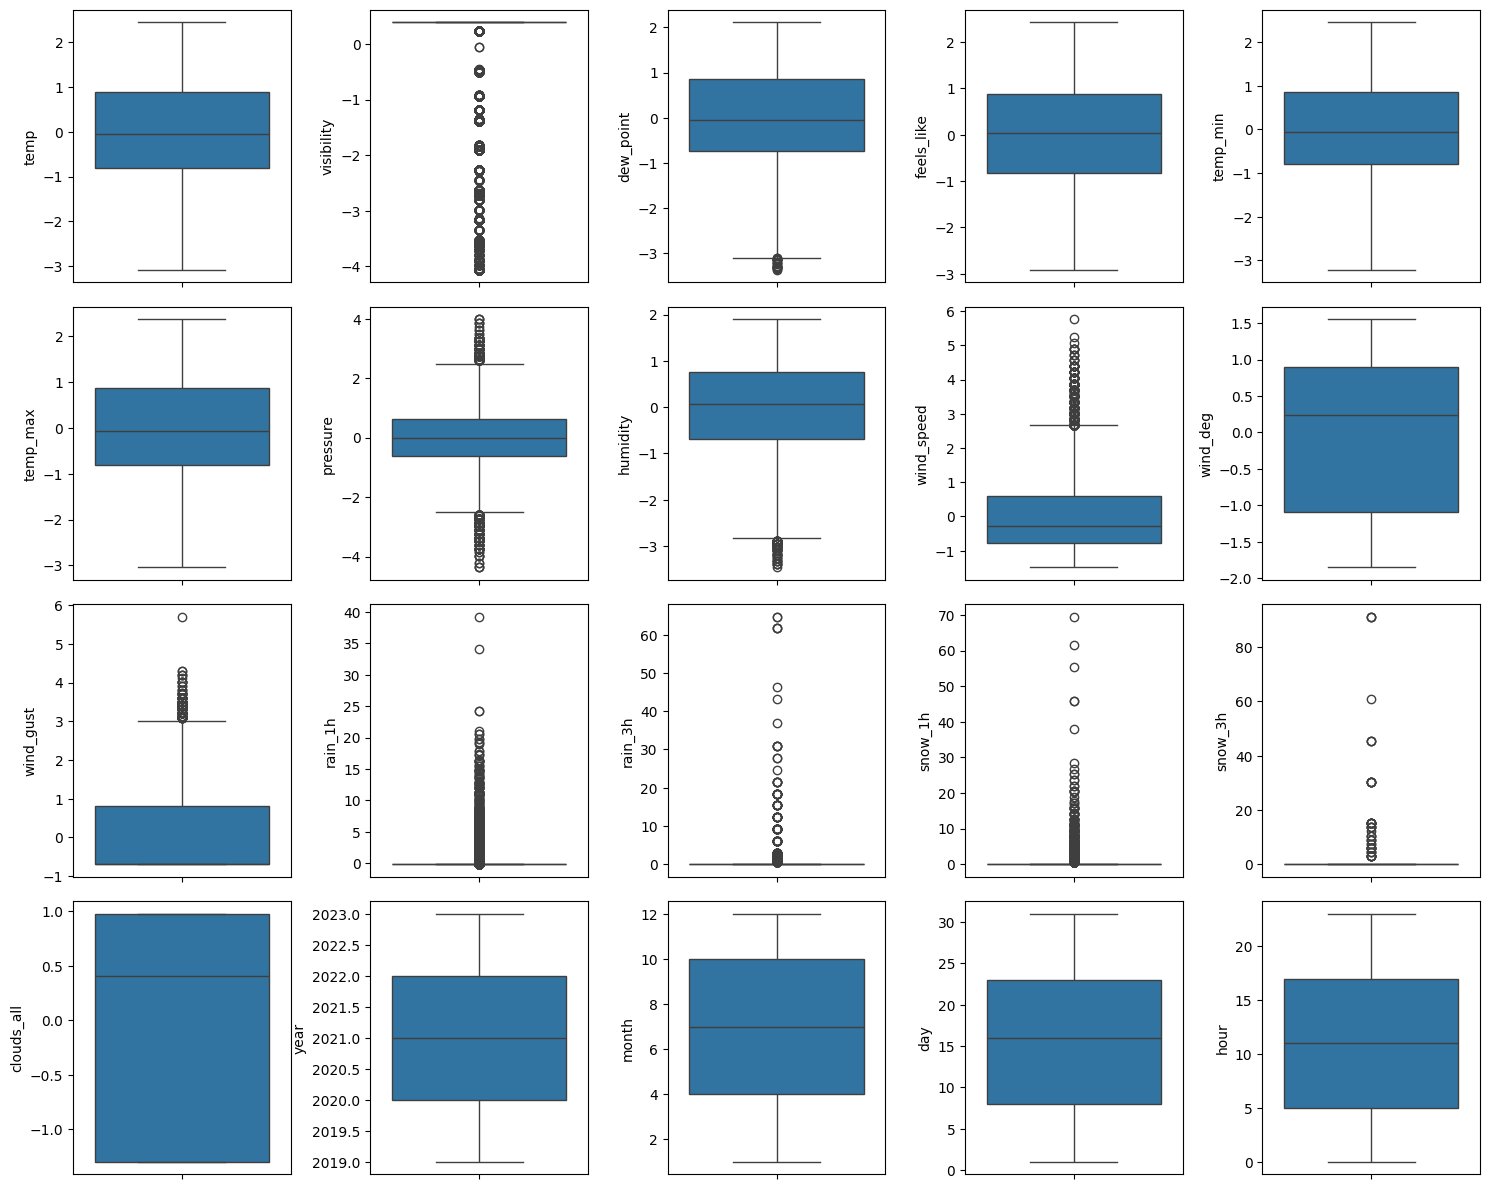

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# assuming 'df' is your DataFrame
n_cols = 5  # number of columns in each row
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # calculate number of rows

fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 3*n_rows))

for i, col in enumerate(numerical_columns):
    row = i // n_cols
    col_idx = i % n_cols
    sns.boxplot(df[col], ax=axs[row, col_idx])

# remove any unused subplots
for i in range(len(numerical_columns), n_rows*n_cols):
    row = i // n_cols
    col_idx = i % n_cols
    axs[row, col_idx].axis('off')

plt.tight_layout()
plt.show()

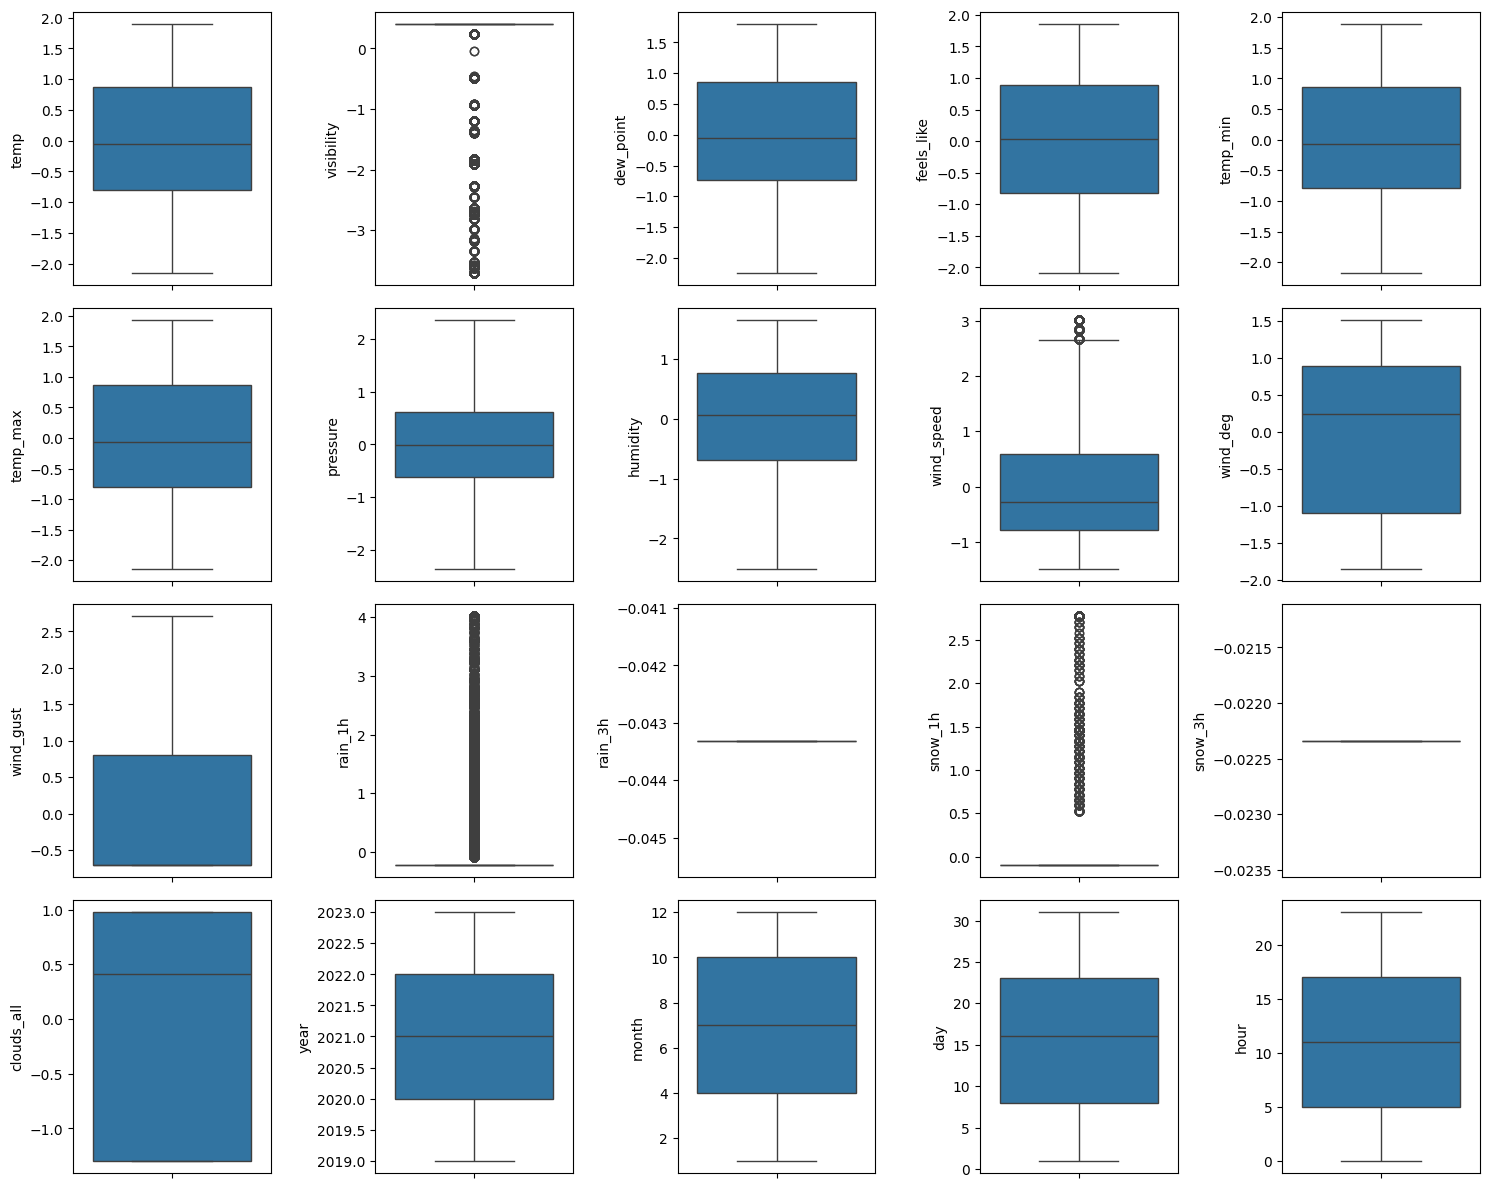

In [18]:
# assuming 'df' is your DataFrame
n_cols = 5  # number of columns in each row
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # calculate number of rows

fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 3*n_rows))

for i, col in enumerate(numerical_columns):
    row = i // n_cols
    col_idx = i % n_cols
    sns.boxplot(df_floor_and_cap[col], ax=axs[row, col_idx])

# remove any unused subplots
for i in range(len(numerical_columns), n_rows*n_cols):
    row = i // n_cols
    col_idx = i % n_cols
    axs[row, col_idx].axis('off')

plt.tight_layout()
plt.show()

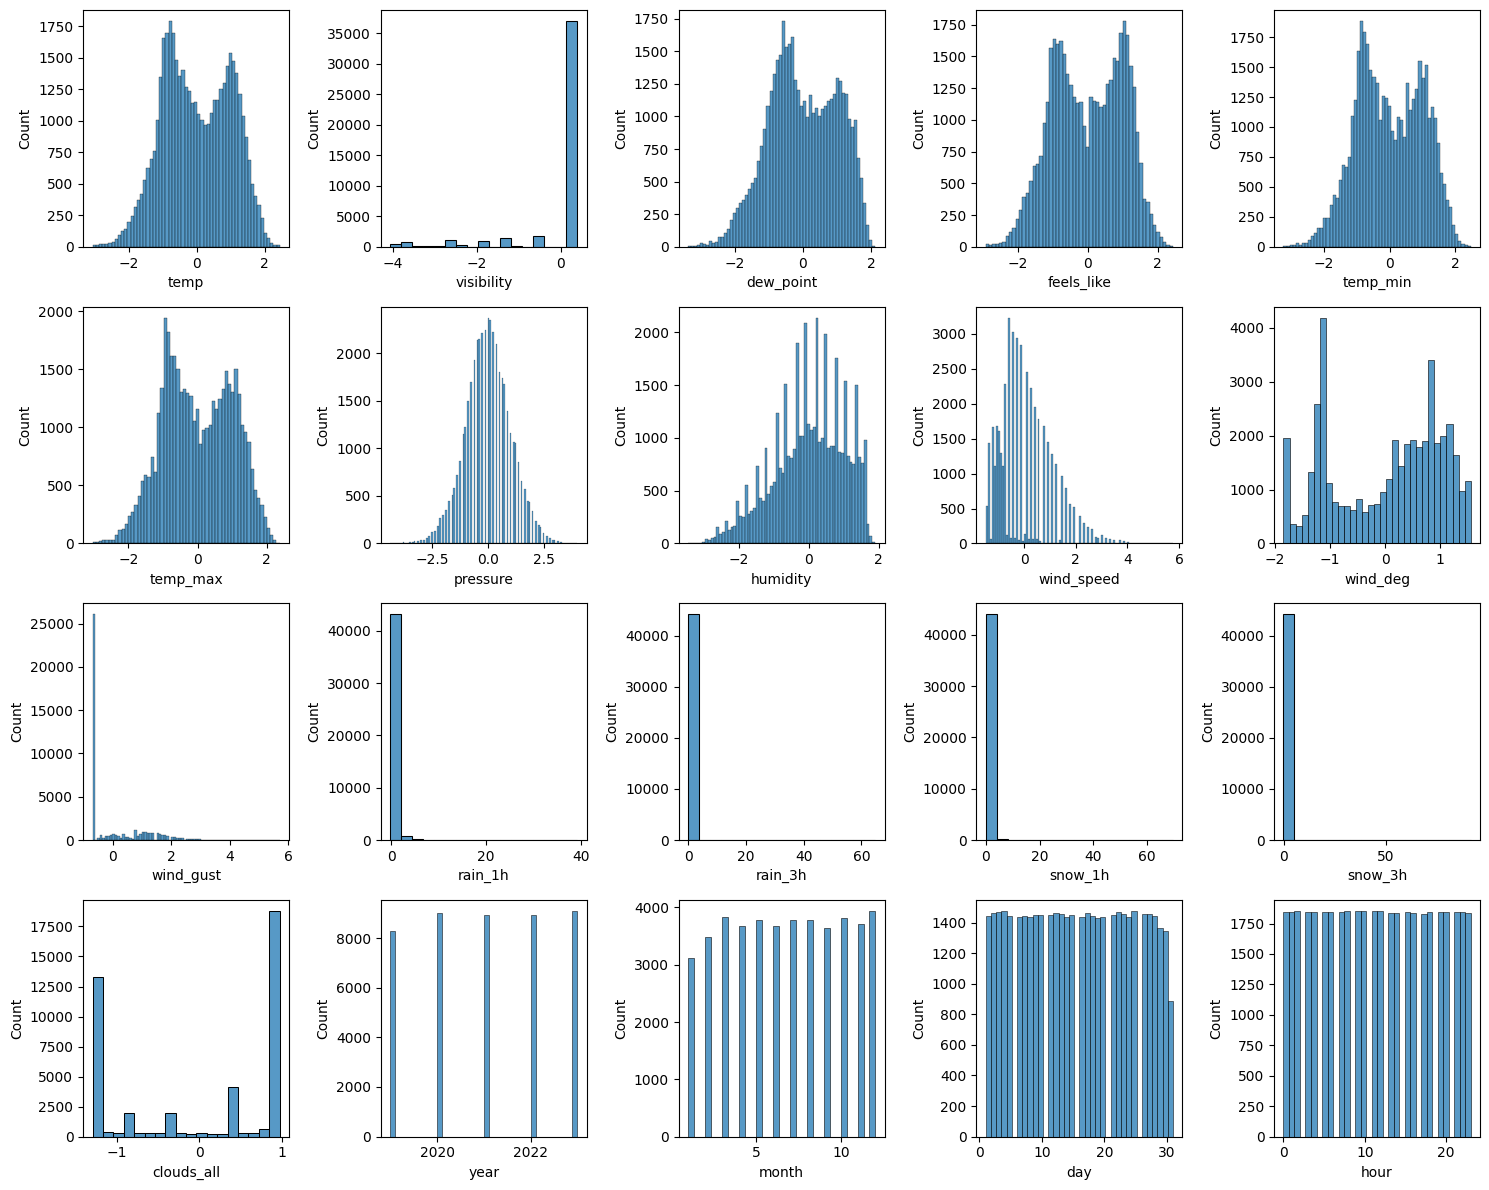

In [19]:
# assuming 'df' is your DataFrame
n_cols = 5  # number of columns in each row
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # calculate number of rows

fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 3*n_rows))

for i, col in enumerate(numerical_columns):
    row = i // n_cols
    col_idx = i % n_cols
    sns.histplot(df[col], ax=axs[row, col_idx])

# remove any unused subplots
for i in range(len(numerical_columns), n_rows*n_cols):
    row = i // n_cols
    col_idx = i % n_cols
    axs[row, col_idx].axis('off')

plt.tight_layout()
plt.show()

In [20]:
for column in numerical_columns:
    print(f"Column: {column} Skew: {df[column].skew().round(2)}")

Column: temp Skew: -0.05
Column: visibility Skew: -2.61
Column: dew_point Skew: -0.14
Column: feels_like Skew: -0.12
Column: temp_min Skew: -0.06
Column: temp_max Skew: -0.03
Column: pressure Skew: -0.02
Column: humidity Skew: -0.44
Column: wind_speed Skew: 0.96
Column: wind_deg Skew: -0.3
Column: wind_gust Skew: 1.17
Column: rain_1h Skew: 11.11
Column: rain_3h Skew: 41.61
Column: snow_1h Skew: 30.07
Column: snow_3h Skew: 67.88
Column: clouds_all Skew: -0.29
Column: year Skew: -0.02
Column: month Skew: -0.02
Column: day Skew: 0.01
Column: hour Skew: 0.0


In [21]:
for column in numerical_columns:
    print(f"Column: {column} Skew: {df_floor_and_cap[column].skew().round(2)}")

Column: temp Skew: -0.02
Column: visibility Skew: -2.58
Column: dew_point Skew: -0.09
Column: feels_like Skew: -0.1
Column: temp_min Skew: -0.04
Column: temp_max Skew: -0.01
Column: pressure Skew: 0.02
Column: humidity Skew: -0.41
Column: wind_speed Skew: 0.84
Column: wind_deg Skew: -0.31
Column: wind_gust Skew: 1.11
Column: rain_1h Skew: 4.69
Column: rain_3h Skew: 0.0
Column: snow_1h Skew: 6.92
Column: snow_3h Skew: 0.0
Column: clouds_all Skew: -0.29
Column: year Skew: -0.02
Column: month Skew: -0.02
Column: day Skew: 0.01
Column: hour Skew: 0.0


## Trimming

In [30]:
# Define a threshold for trimming (1st and 99th percentiles)
threshold_low = numerical_df.quantile(0.01)
threshold_high = numerical_df.quantile(0.99)

# Trim the DataFrame
df_trimmed = numerical_df[~((numerical_df < threshold_low) | (numerical_df > threshold_high)).any(axis=1)]

## Log transformation

In [31]:
# Apply log transformation (add 1 to avoid log(0) issues)
df_log_transformed = numerical_df.apply(lambda x: np.log1p(x))


/home/andrefrak/workspace/lambton_ws/nlp/.venv/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


# Step 8: 

Use the unsupervised learning method of your choice (e.g: K-Means ) on the data you have for this assignment and discuss the outcomes. (at least 2 methods to be used and discussed)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize the data before clustering
scaler = StandardScaler()

# Choose the datasets for clustering
datasets = {
    'Original': df,
    'Floored/Capped': df_floored_capped,
    'Trimmed': df_trimmed,
    'Log Transformed': df_log_transformed
}

# Store cluster results
cluster_results = {}

# Run K-Means for each dataset
for name, data in datasets.items():
    if data.empty:  # Skip empty DataFrames
        continue
    X_scaled = scaler.fit_transform(data)
    
    kmeans = KMeans(n_clusters=3, random_state=42)  # Example with 3 clusters
    labels = kmeans.fit_predict(X_scaled)
    
    cluster_results[name] = labels
    
    # Optional: Plotting the clusters (for visualization purposes)
    plt.figure(figsize=(8, 6))
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', marker='o')
    plt.title(f'K-Means Clustering on {name}')
    plt.xlabel('Feature 1 (Standardized)')
    plt.ylabel('Feature 2 (Standardized)')
    plt.show()
